# Web API Data, Plotly
#### CS 66: Introduction to Computer Science II

# References for this lecture

Requests module user's guide: https://docs.python-requests.org/en/latest/

Plotly graphing library: https://plotly.com/python/

## Picking up where we left off

Complete Group Activity problems 3-9 from last time.

## Assignment 4: Popular Movies

Put your code from Problem 9 on the previous set of notes into a file called `popular_movies.py`. You should only include the function `most_popular_in_genre` (note that your function should not refer to any global variables - the `movies` variable will be supplied by the call to your function in the automated unit tests (and it could be from a different file with the same format - don't load the file as part of your code!). 

Then, submit your `popular_movies.py` file to the __Assignment 4: Popular Movies__ assignment on codePost. Your `most_popular_in_genre` will be tested with some automated tests.

## Working with some real data: Web APIs

Now we're going to try requesting some JSON data directly from a server on the Internet.

One source for interesting data: Web APIs - application programming interfaces that allow your programmer to access data through `http` requests.

There are many APIs you can use to build your own applications: NASA, Associated Press, Weather, IMDB, etc.

We'll try out an easy-to-use API of COVID data: https://covid19api.com/

Documentation here: https://documenter.getpostman.com/view/10808728/SzS8rjbc

Try this to request data about COVID in the US:


In [3]:
import requests

response = requests.get("https://api.covid19api.com/live/country/united-states")

print(response)

<Response [200]>


## Installing modules

When you ran the code above, you may have gotten an error message that said something like

```shell
ModuleNotFoundError: No module named 'requests'
```

which means that your Python installation doesn't yet have the `requests` module installed. The good news is that installing packages like this is easy, but it requires you to execute some commands at the Terminal.

__Step 1:__ When you run your Python code in VS Code, you'll note that the Python executable is the first thing it puts in the command that it issues to your terminal. Here's an example of what mine looks like (the thing circled in red is the Python command on my computer), but yours will probably look different depending on where Python is installed on your computer.

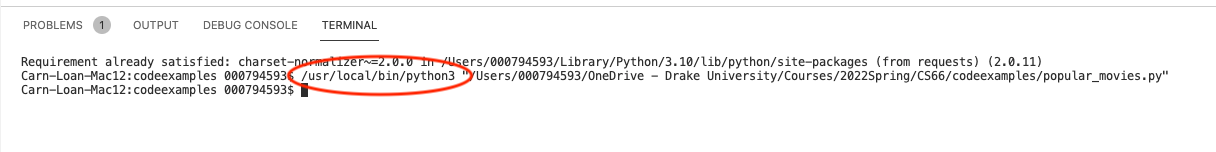

__Step 2:__ Use the Python command for your computer to run the command

```shell
python3 -m pip install requests
```

This tells Python to use its package installer (`pip`) to install the `requests` package. On my computer, it would look like this:

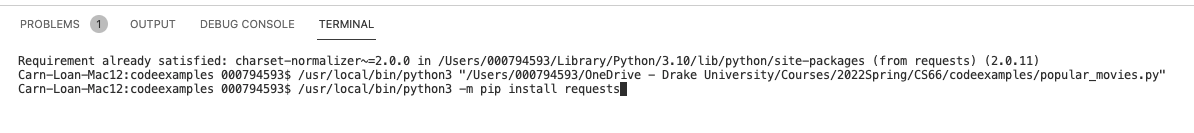

This should go through a process where it downloads and installs a series of packages - you should see output messages and progress bars appearing in the terminal. 

__Note:__ If you see a message about your version of `pip` being out of date, you can probably ignore it. Or, you can try this command to update it (and then you can try re-installing the `requests` module as you did above).

```shell
python3 -m pip install --upgrade pip
```

Now try the code to access the API again. If the response that you print is

`<Response [200]>`

Then it means that it worked correctly since 200 is the `http` code for "it worked". If you see any other code, it means something went wrong.

In [4]:
import requests

response = requests.get("https://api.covid19api.com/live/country/united-states")

print(response)

<Response [200]>


You can then access the JSON data transmitted by the response using the response's `.json()` method - save this to a variable like this, then go ahead and print it to see what you get.

In [ ]:
import requests

response = requests.get("https://api.covid19api.com/live/country/united-states")

data = response.json()
print(data)

## Group Activity Problem 1

Explore the `data` variable you got back. What is the format of this data? How many items did you get back? What do you think this data represents? Write the answers down in your notes.

## Group Activity Problem 2

Write the code that will find the record for the most recent COVID numbers from the state of Iowa.

## Group Activity Problem 3

Now we're going to try accessing some different data from the same Web API service. Notice that the code below is the same, but it uses a different web address - these different web addresses are called __endpoints__ of the API.

In [ ]:
import requests

response = requests.get("https://api.covid19api.com/summary")

data = response.json()
print(data)


Discuss the format of this data - it's not the same as with the other endpoint. This is an example where it's not just a list of dictionaries like we've seen before. What is the type of the outer-most thing (data)? How many countries are represented? Write the answers in your notes.

## Group Activity Problem 4

Write the code that will use the https://api.covid19api.com/summary endpoint to display the number of new deaths from COVID in the United States of America.

## Group Activity Problem 5

Use the COVID API documentation to find another endpoint you could use. 

https://documenter.getpostman.com/view/10808728/SzS8rjbc

Try it out with your code. Discuss what data you're getting from this endpoint and write it down in your notes.

## Group Activity Problem 6

Now we're going to use another new Python package: `plotly`. Plotly is a really neat package for making interactive visualizations from data.

Start by installing plotly:

```shell
python3 -m pip install plotly
```

Then try running this example and discuss what the code is doing.

In [4]:
import plotly.express as px
import requests


response = requests.get("https://api.covid19api.com/summary")

data = response.json()
country_data = data["Countries"]

fig = px.bar(country_data,x="Country",y="NewConfirmed",title="New Confirmed Cases by Country")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## Group Activity Problem 7

Note that the above bar chart has too many countries to see any of the data well. Before making the plot, look through the list of countries and remove any that have less than 10,000 cases (it may be easier to make a new list and append only the countries with at least 10,000 cases).

## Group Activity Problem 8

Now let's try to use the https://api.covid19api.com/live/country/united-states endpoint to create a line graph. Try the code below:

In [1]:
import plotly.express as px
import requests

response = requests.get("https://api.covid19api.com/live/country/united-states")

data = response.json()

fig = px.line(data, x="Date", y="Deaths", color="Province", title='COVID Deaths in the US')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

## Group Activity Problem 9

The main problems with the above plot seem to be (1) a stray data point from 1970 in the US Virgin Islands, and (2) too many states. Pick three states (say Iowa, Illinois, and Minnesota), and remove any items that aren't from one of those states (or, make a new list and only include items from those states). Then, use the new data for the plot.

## Group Activity Problem 10 (if you have time)

Check out more examples of different kinds of plots you can make with Plotly: https://plotly.com/python/

Make some new cool visualizations from these endpoints or others.